In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pyodbc

In [20]:
sql_conn = pyodbc.connect('DRIVER={SQL Server};'
                            'SERVER=L_AAGDATIX;'
                            'DATABASE=DatixCRM;'
                            'Trusted_Connection=yes') 
query = "set transaction isolation level read uncommitted select inc_dincident,inc_dreported from DatixCRM.dbo.incidents_main where inc_type='PAT' and inc_category='MEDIC' and inc_organisation='QA'"
df = pd.read_sql(query, sql_conn)
print(df)

     inc_dincident inc_dreported
0       2016-03-31    2016-03-31
1       2016-03-31    2016-04-01
2       2016-04-01    2016-04-01
3       2016-03-25    2016-04-01
4       2016-04-02    2016-04-02
5       2016-04-01    2016-04-02
6       2016-04-01    2016-04-02
7       2016-04-02    2016-04-02
8       2016-04-02    2016-04-02
9       2016-04-03    2016-04-03
10      2016-04-03    2016-04-03
11      2016-04-02    2016-04-04
12      2016-04-02    2016-04-04
13      2016-04-02    2016-04-04
14      2016-04-02    2016-04-04
15      2016-04-02    2016-04-04
16      2016-04-04    2016-04-04
17      2016-04-02    2016-04-04
18      2016-04-04    2016-04-04
19      2016-04-02    2016-04-04
20      2016-03-23    2016-04-04
21      2016-04-02    2016-04-04
22      2016-04-02    2016-04-04
23      2016-04-04    2016-04-04
24      2016-04-04    2016-04-05
25      2016-04-05    2016-04-05
26      2016-03-30    2016-04-05
27      2016-04-06    2016-04-06
28      2016-04-06    2016-04-06
29      20

In [21]:
df_inc = df.copy()
df_inc = df_inc[df_inc.inc_dincident > '2016-03-31']
df_inc = df_inc[df_inc.inc_dincident < '2019-10-05']
df_inc['weekday'] = df_inc['inc_dincident'].dt.weekday
print(df)

     inc_dincident inc_dreported
0       2016-03-31    2016-03-31
1       2016-03-31    2016-04-01
2       2016-04-01    2016-04-01
3       2016-03-25    2016-04-01
4       2016-04-02    2016-04-02
5       2016-04-01    2016-04-02
6       2016-04-01    2016-04-02
7       2016-04-02    2016-04-02
8       2016-04-02    2016-04-02
9       2016-04-03    2016-04-03
10      2016-04-03    2016-04-03
11      2016-04-02    2016-04-04
12      2016-04-02    2016-04-04
13      2016-04-02    2016-04-04
14      2016-04-02    2016-04-04
15      2016-04-02    2016-04-04
16      2016-04-04    2016-04-04
17      2016-04-02    2016-04-04
18      2016-04-04    2016-04-04
19      2016-04-02    2016-04-04
20      2016-03-23    2016-04-04
21      2016-04-02    2016-04-04
22      2016-04-02    2016-04-04
23      2016-04-04    2016-04-04
24      2016-04-04    2016-04-05
25      2016-04-05    2016-04-05
26      2016-03-30    2016-04-05
27      2016-04-06    2016-04-06
28      2016-04-06    2016-04-06
29      20

In [22]:
total_weeks = (max(df_inc.inc_dincident)-min(df_inc.inc_dincident)).days/7
print(total_weeks)

183.0


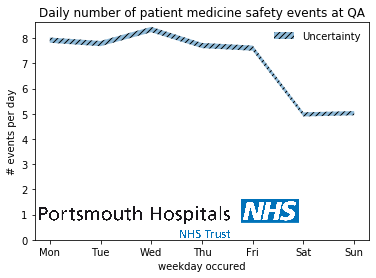

In [29]:
bins = [i-0.5 for i in range(8)]
data_x = [i for i in range(7)]
data_y_tot,_ = np.histogram(df_inc.weekday.values, bins=bins)
data_y = data_y_tot/total_weeks
data_y_err = np.sqrt(data_y_tot)/total_weeks
plt.fill_between(data_x,data_y-data_y_err/2,y2=data_y+data_y_err/2,alpha=0.5,hatch="////",label='Uncertainty')
plt.legend(frameon=False)
plt.ylim(bottom=0)
ax = plt.gca()
locs, labels = plt.xticks()
plt.xticks(np.arange(7),labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.xlabel('weekday occured');
plt.ylabel('# events per day')
plt.title('Daily number of patient medicine safety events at QA');
img = plt.imread("nhsportsmouth.png");
ax = plt.axes([0.125+0.01,-0.1, 0.6, 0.6], frameon=True)  # Change the numbers in this array to position your image [left, bottom, width, height])
ax.imshow(img);
ax.axis('off'); # get rid of the ticks and ticklabels

In [30]:
df_rep = df.copy()
df_rep = df_rep[df_rep.inc_dreported > '2016-03-31']
df_rep = df_rep[df_rep.inc_dreported < '2019-10-05']
df_rep['weekday'] = df_rep['inc_dincident'].dt.weekday

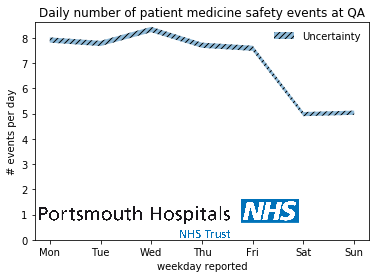

In [31]:
data_y_tot,_ = np.histogram(df_rep.weekday.values, bins=bins)
data_y = data_y_tot/total_weeks
data_y_err = np.sqrt(data_y_tot)/total_weeks
plt.fill_between(data_x,data_y-data_y_err/2,y2=data_y+data_y_err/2,alpha=0.5,hatch="////",label='Uncertainty')
plt.legend(frameon=False)
plt.ylim(bottom=0)
ax = plt.gca()
locs, labels = plt.xticks()
plt.xticks(np.arange(7),labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.xlabel('weekday reported');
plt.ylabel('# events per day')
plt.title('Daily number of patient medicine safety events at QA');
ax.axvline(4.5,color='red',linestyle='--')
img = plt.imread("nhsportsmouth.png");
ax = plt.axes([0.125+0.01,-0.1, 0.6, 0.6], frameon=True)  # Change the numbers in this array to position your image [left, bottom, width, height])
ax.imshow(img);
ax.axis('off'); # get rid of the ticks and ticklabels